___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 


## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [ ]:
df = pd.DataFrame(pd.read_csv('KNN_Project_Data.csv'))

**Check the head of the dataframe.**

In [ ]:
df.head()

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [ ]:
sns.pairplot(df, hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.


** Create a StandardScaler() object called scaler.**

In [5]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [7]:
transformed = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [8]:
dft = pd.DataFrame(transformed)
dft.head()

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [11]:
X = dft
y = df['TARGET CLASS']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

**Create a KNN model instance with n_neighbors=1**

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [16]:
pred = knn.predict(X_test)

** Create a confusion matrix and classification report.**

In [17]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[95 31]
 [36 88]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       126
           1       0.74      0.71      0.72       124

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [31]:
results=[]
acc=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    results.append(np.mean(np.abs(preds - y_test)))
    acc.append(accuracy_score(y_test,preds))
    

**Now create the following plot using the information from your for loop.**

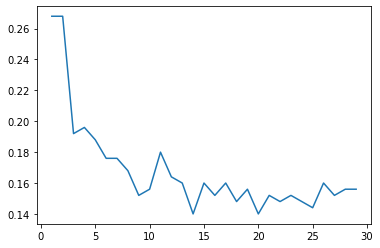

In [28]:
sns.lineplot(np.arange(1,30), results)

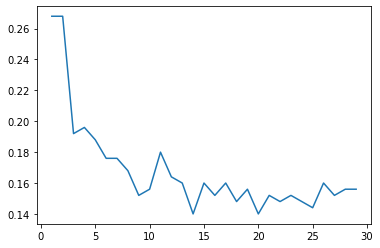

In [29]:
sns.lineplot(np.arange(1,30), results)

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [35]:
n = np.argmax(acc) + 1

In [38]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [40]:
print(accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

0.86
[[113  13]
 [ 22 102]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.89      0.82      0.85       124

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

